In [4]:
import pandas as pd 

medicament = 'DICLECTIN'
df_medicament=pd.read_csv("../../Analyse/df_medicament.csv")
df=pd.read_csv("../../../df_patient.csv")

filtered_df_medicament = df_medicament[df_medicament['DRUGNAME'] == medicament]

In [5]:
print(filtered_df_medicament['INDICATION_NAME_FR'])

0                   Nausées matinales de la grossesse
2        Produit utilisé pour une indication inconnue
484                                            Nausée
8275                                      Vomissement
43951                                Hyperchlorhydrie
51718                                     Prophylaxie
51724          Exposition foetale durant la grossesse
61699                         Diabète sucré de type 2
71181           Prophylaxie des nausée et vomissement
Name: INDICATION_NAME_FR, dtype: object


In [6]:
df_merged = pd.merge(df, filtered_df_medicament, on='id_medicament')


In [7]:
df_merged

,REPORT_ID,DATRECEIVED,GENDER_FR_encoded,AGE_Y,WEIGHT,HEIGHT,SERIOUSNESS_FR_encoded,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,id_medicament,id_effet_secondaire,DRUGNAME,INDICATION_NAME_FR
0,120066,09-NOV-98,2.0,0.073,NaN,68.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1,1,DICLECTIN,Nausées matinales de la grossesse
1,120066,09-NOV-98,2.0,0.073,NaN,68.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1,2,DICLECTIN,Nausées matinales de la grossesse
2,120066,09-NOV-98,2.0,0.073,NaN,68.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1,3,DICLECTIN,Nausées matinales de la grossesse
3,120066,09-NOV-98,2.0,0.073,NaN,68.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1,4,DICLECTIN,Nausées matinales de la grossesse
4,607057,26-SEP-18,2.0,19.000,NaN,NaN,1,2.0,2.0,2.0,2.0,2.0,1.0,1,3903,DICLECTIN,Nausées matinales de la grossesse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,902469531,20-MAR-19,2.0,NaN,NaN,NaN,1,2.0,2.0,2.0,2.0,2.0,1.0,61700,4868,DICLECTIN,Diabète sucré de type 2
892,902469531,20-MAR-19,2.0,NaN,NaN,NaN,1,2.0,2.0,2.0,2.0,2.0,1.0,61700,3408,DICLECTIN,Diabète sucré de type 2
893,903289187,19-JUN-20,2.0,56.000,NaN,NaN,1,2.0,2.0,2.0,2.0,1.0,1.0,71182,1541,DICLECTIN,Prophylaxie des nausée et vomissement
894,903289187,19-JUN-20,2.0,56.000,NaN,NaN,1,2.0,2.0,2.0,2.0,1.0,1.0,71182,288,DICLECTIN,Prophylaxie des nausée et vomissement


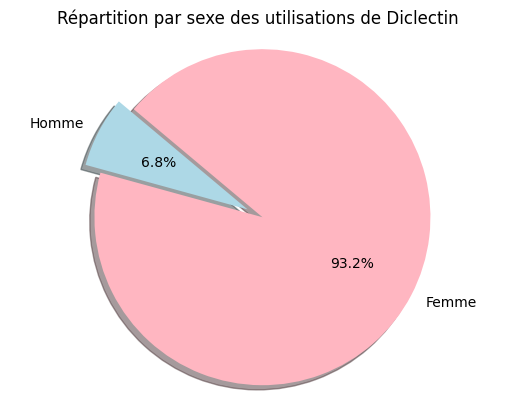

In [8]:
import matplotlib.pyplot as plt
sexe_counts = df_merged['GENDER_FR_encoded'].value_counts()

# Créer le graphique à secteurs
labels = ['Homme', 'Femme']  # Assumant que 1.0 = Homme et 2.0 = Femme
sizes = [sexe_counts[1.0], sexe_counts[2.0]]
colors = ['lightblue', 'lightpink']
explode = (0.1, 0)  # Séparer le premier secteur légèrement

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Assure que le camembert est dessiné en cercle

plt.title('Répartition par sexe des utilisations de Diclectin')
plt.savefig('repartition_sexe.png')
plt.show()

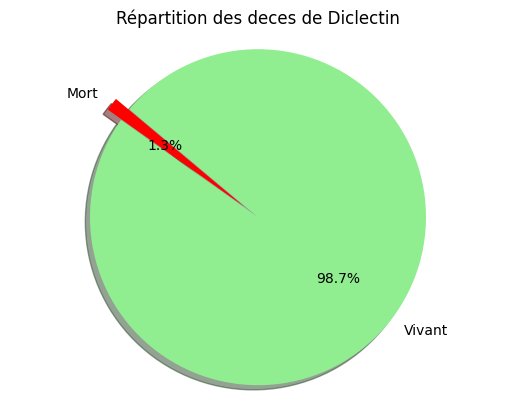

In [9]:
sexe_counts = df_merged['DEATH'].value_counts()

# Créer le graphique à secteurs
labels = ['Mort', 'Vivant']  # Assumant que 1.0 = Homme et 2.0 = Femme
sizes = [sexe_counts[1.0], sexe_counts[2.0]]
colors = ['red', 'lightgreen']
explode = (0.1, 0)  # Séparer le premier secteur légèrement

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Assure que le camembert est dessiné en cercle

plt.title('Répartition des deces de Diclectin')
plt.savefig('repartition_mort.png')
plt.show()

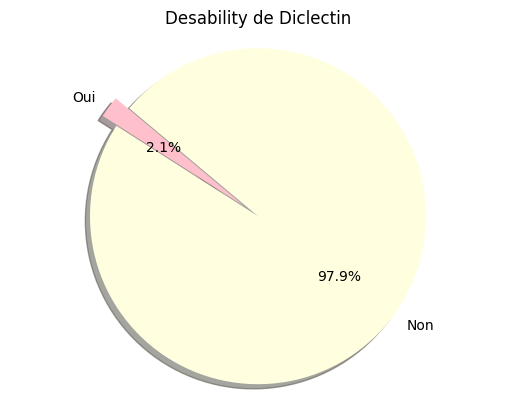

In [10]:
sexe_counts = df_merged['CONGENITAL_ANOMALY'].value_counts()

# Créer le graphique à secteurs
labels = ['Oui', 'Non']  # Assumant que 1.0 = Homme et 2.0 = Femme
sizes = [sexe_counts[1.0], sexe_counts[2.0]]
colors = ['pink', 'lightyellow']
explode = (0.1, 0)  # Séparer le premier secteur légèrement

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Assure que le camembert est dessiné en cercle

plt.title('Desability de Diclectin')
plt.savefig('repartition_desability.png')
plt.show()

In [25]:
from datetime import datetime

sexe_patient = 'F'
date_naissance_patient = '1990-06-23'
taille_patient = 167
# Calcul de l'âge du patient en années
date_naissance_patient = datetime.strptime(date_naissance_patient, '%Y-%m-%d')
today = datetime.today()
age_patient_years = (today - date_naissance_patient).days / 365.25

# Définition des tolérances
age_tolerance = 10  # années
taille_tolerance = 20  # cm

# Filtrage pour le sexe (en supposant que 2.0 correspond à 'F')
gender_encoded = 2.0 if sexe_patient == 'F' else 1.0

# Filtrage du DataFrame
df_filtered = df[
    (df['GENDER_FR_encoded'] == gender_encoded) &
    (df['AGE_Y'] >= age_patient_years - age_tolerance) & 
    (df['AGE_Y'] <= age_patient_years + age_tolerance)&
    (df['HEIGHT'] >= taille_patient - taille_tolerance) &
    (df['HEIGHT'] <= taille_patient + taille_tolerance) 
]

# Afficher le DataFrame filtré
df_filtered

,REPORT_ID,DATRECEIVED,GENDER_FR_encoded,AGE_Y,WEIGHT,HEIGHT,SERIOUSNESS_FR_encoded,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,id_medicament,id_effet_secondaire
4,122262,04-SEP-09,2.0,36.0,NaN,153.0,1,0.0,1.0,0.0,0.0,0.0,0.0,2,5
3355,218052,23-MAY-17,2.0,41.0,NaN,170.0,1,2.0,2.0,2.0,2.0,2.0,1.0,247,507
3356,218052,23-MAY-17,2.0,41.0,NaN,170.0,1,2.0,2.0,2.0,2.0,2.0,1.0,247,494
3357,218052,23-MAY-17,2.0,41.0,NaN,170.0,1,2.0,2.0,2.0,2.0,2.0,1.0,247,149
3358,218052,23-MAY-17,2.0,41.0,NaN,170.0,1,2.0,2.0,2.0,2.0,2.0,1.0,165,507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13373472,907052931,31-JAN-24,2.0,40.0,NaN,157.0,1,2.0,2.0,2.0,2.0,1.0,2.0,10213,114
13373473,907052931,31-JAN-24,2.0,40.0,NaN,157.0,1,2.0,2.0,2.0,2.0,1.0,2.0,10213,200
13373474,907052931,31-JAN-24,2.0,40.0,NaN,157.0,1,2.0,2.0,2.0,2.0,1.0,2.0,10213,2184
13373475,907052931,31-JAN-24,2.0,40.0,NaN,157.0,1,2.0,2.0,2.0,2.0,1.0,2.0,10213,7104


In [27]:
top_3_effet_secondaire = df_filtered['id_effet_secondaire'].value_counts().head(5)

print("\nTop 5 valeurs dans la colonne 'id_effet_secondaire':")
print(top_3_effet_secondaire)


Top 5 valeurs dans la colonne 'id_effet_secondaire':
id_effet_secondaire
161    2815
62     2647
69     2289
63     2276
153    2062
Name: count, dtype: int64


In [28]:
df_effet_secondaire=pd.read_csv("../../Analyse/df_effet_secondaire.csv")

In [29]:
df_effet_secondaire

,PT_NAME_FR,SOC_NAME_FR,id_effet_secondaire
0,Dysmorphie,"Affections congenitales, familiales et genetiques",1
1,Ventricule cerebral dilate,Affections du systeme nerveux,2
2,Dysplasie septo-optique,"Affections congenitales, familiales et genetiques",3
3,Holoprosencephalie,"Affections congenitales, familiales et genetiques",4
4,Enterite,Affections gastro-intestinales,5
...,...,...,...
12830,Hypo-uricemie,Troubles du metabolisme et de la nutrition,12831
12831,Pachydermoperiostose,"Affections congenitales, familiales et genetiques",12832
12832,Gastrite a cytomegalovirus,Infections et infestations,12833
12833,Distomatose a Fasciolopsis buski,Infections et infestations,12834


In [31]:
top_3_effet_ids = top_3_effet_secondaire.index.tolist()
top_3_effet_noms = df_effet_secondaire[df_effet_secondaire['id_effet_secondaire'].isin(top_3_effet_ids)]

print("\nNoms des effets secondaires les plus fréquents :")
top_3_effet_noms


Noms des effets secondaires les plus fréquents :


,PT_NAME_FR,SOC_NAME_FR,id_effet_secondaire
61,Nausee,Affections gastro-intestinales,62
62,Inefficacite medicamenteuse,Troubles generaux et anomalies au site d'admin...,63
68,Fatigue,Troubles generaux et anomalies au site d'admin...,69
152,Diarrhee,Affections gastro-intestinales,153
160,Cephalee,Affections du systeme nerveux,161
